# SADAIA: Data Science Bootcamp 

#### Security First Agency (SFA) Project For Securing MTA's Stations


### Summery:
Metropolitan Transportation Authority (MTA) has been receiving a lot of complaining messages from commuters that there are many stealing and harm events in stations, and they realize that their stations need more securing controls. But unfortunately, they don’t have enough budget to do so. So, they decided to hire Security First Agency (SFA) and ask them to make MTA’s stations more secure with less cost as possible.


In [ ]:
conda install -c https://conda.anaconda.org/plotly plotly

In [88]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from functools import partial, reduce
from sqlalchemy import create_engine
import plotly.graph_objects as go
from sqlalchemy import create_engine

In [39]:
pwd

'/Users/norahalqahtani/gitfolder'

In [ ]:

# 
# download MTA dataset from Source: http://web.mta.info/developers/turnstile.html. and creating DATE_TIME column

def get_data_parse_dt(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url, parse_dates=[['DATE','TIME']], keep_date_col=True))
    return pd.concat(dfs)
        
week_nums = [210925 ,210918 ,210911 ,210904 ,210828 ,210821 ,210814 ,210807 ,210731 ,210724 ,210717 ,210710]
turnstiles_df = get_data_parse_dt(week_nums)

turnstiles_df.to_csv('mtadata.csv',index=False ) #to doanload our connected datasets as a csv file

In [ ]:
#connecting with database
from sqlalchemy import create_engine
engine = create_engine("sqlite:///mtaDB.db")
df = pd.read_sql('SELECT * FROM mtadata;', engine)

##### I have downloaded the datasets via the above methods and it has been working well.  
but once I reopened the notebook it did not work for some reason. 
So, I tried the code below without running the above and thankfully it worked

In [90]:


turnstiles_df = pd.read_csv('mtadata.csv')
turnstiles_df.head(1)

,DATE_TIME,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,2021-09-18 00:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/18/2021,00:00:00,REGULAR,7637026,2613455


In [91]:
turnstiles_df

,DATE_TIME,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,2021-09-18 00:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/18/2021,00:00:00,REGULAR,7637026,2613455
1,2021-09-18 04:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/18/2021,04:00:00,REGULAR,7637036,2613457
2,2021-09-18 08:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/18/2021,08:00:00,REGULAR,7637047,2613478
3,2021-09-18 12:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/18/2021,12:00:00,REGULAR,7637104,2613524
4,2021-09-18 16:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/18/2021,16:00:00,REGULAR,7637236,2613561
...,...,...,...,...,...,...,...,...,...,...,...,...
2514583,2021-07-09 05:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/09/2021,05:00:00,REGULAR,5554,585
2514584,2021-07-09 09:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/09/2021,09:00:00,REGULAR,5554,585
2514585,2021-07-09 09:37:06,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/09/2021,09:37:06,REGULAR,5554,585
2514586,2021-07-09 13:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/09/2021,13:00:00,REGULAR,5554,585


###### when I used the dataframe by this way I faced another problem the data type of 'DATE_TIME' column become an objected
instead of datetime values so I could not apply some functions in it 

In [ ]:
print(turnstiles_df['DATE_TIME'].dtypes)


In [ ]:
#So, I droupded it then add it again with datetime values
turnstiles_df = turnstiles_df.drop(["DATE_TIME"], axis=1, errors="ignore")
turnstiles_df

In [ ]:
turnstiles_df["DATE_TIME"] = pd.to_datetime(turnstiles_df.DATE + " " + turnstiles_df.TIME, 
                                            format="%m/%d/%Y %H:%M:%S")
turnstiles_df

# CLEAN DATASET :




In [ ]:
#check and remove white spaces
print(turnstiles_df.columns)
turnstiles_df.columns = [column.strip() for column in turnstiles_df.columns]
turnstiles_df.columns

In [ ]:
print(turnstiles_df.info())
print("\n",turnstiles_df.describe())
#descover nall values
print("\n",turnstiles_df.isna().sum())

print("\n", turnstiles_df.shape)

In [ ]:
# Sanity Check to verify that "C/A", "UNIT", "SCP", "STATION", "DATE_TIME" is unique
(turnstiles_df
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(123)

In [ ]:
# remove duplicated values
turnstiles_df.drop_duplicates(subset = ["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)

#  verify that duplicated values removed
(turnstiles_df
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(123)

In [ ]:
print(turnstiles_df.columns)
# Drop LINENAME, DESC and DIVISION Columns.  To prevent errors in multiple run of cell, errors on drop is ignored
turnstiles_df = turnstiles_df.drop(["LINENAME", "DIVISION", "DESC"], axis=1, errors="ignore")
print("\n",turnstiles_df.columns)
print("\n", turnstiles_df.shape)

In [ ]:
#create mask for a specific turnstyle at specific day
turnstiles_df[(turnstiles_df['STATION']=='1 AV')& (turnstiles_df['UNIT']=='R248')&(turnstiles_df['C/A']=='H007')
             &(turnstiles_df['SCP']=='00-00-00')& (turnstiles_df['DATE']=='09/18/2021')]

In [ ]:
#Create a column that called "NAMEOFDAY" 
turnstiles_df["DAY_NAME"]= turnstiles_df["DATE_TIME"].dt.day_name()

turnstiles_df

In [ ]:
#adding TIME_INTERVAL column to divid days into 3 parts
turnstiles_df["TIME_INTERVAL"] = (
    np.where( (turnstiles_df.DATE_TIME.dt.hour <= 4), "Night Period"
         ,np.where(
             (turnstiles_df.DATE_TIME.dt.hour <= 12), "Morning Period"
             ,np.where(
                 (turnstiles_df.DATE_TIME.dt.hour <= 16), "Evening Period"
                     ,"Night Period"))))

turnstiles_df

# createing a daily dataframe

In [ ]:
#create a daily dataframe. insted of adding ENTRIES of a day we need to take the top value of a day for one turnstyle because it is refer to all intries for that day in that turnstyle
#taking ENTRIES in acount only
turnstiles_daily_EN = (turnstiles_df
                        .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE","DAY_NAME"],as_index=False)
                        .ENTRIES.first())

turnstiles_daily_EN

In [ ]:
#since number of entries is cumulative. we need to subtract from entries of a day the entries of the day before to get the entries of one day only
turnstiles_daily_EN[["PREV_DATE", "PREV_ENTRIES"]] = (turnstiles_daily_EN
                                                       .groupby(["C/A", "UNIT", "SCP", "STATION","DAY_NAME"])["DATE", "ENTRIES"]
                                                       .apply(lambda grp: grp.shift(1)))

turnstiles_daily_EN

In [ ]:
#since number of entries is cumulative. we need to subtract from entries of a day the entries of the day before to get the entries of one day only
turnstiles_daily_EN[["PREV_DATE", "PREV_ENTRIES"]] = (turnstiles_daily_EN
                                                       .groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"]
                                                       .apply(lambda grp: grp.shift(1)))

# Drop the rows for the earliest date in the df
turnstiles_daily_EN.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

turnstiles_daily_EN

In [ ]:
#check if there are reverse values  
turnstiles_daily_EN[turnstiles_daily_EN["ENTRIES"] < turnstiles_daily_EN["PREV_ENTRIES"]]

In [ ]:
# What's the deal with counter being in reverse
mask = ((turnstiles_df["C/A"] == "A011") & 
(turnstiles_df["UNIT"] == "R080") & 
(turnstiles_df["SCP"] == "01-03-00") & 
(turnstiles_df["STATION"] == "57 ST-7 AV") &
(turnstiles_df["DATE_TIME"].dt.date == datetime.datetime(2021, 7, 4).date()))
turnstiles_df[mask]

In [ ]:
# Let's see how many stations have this problem

(turnstiles_daily_EN[turnstiles_daily_EN["ENTRIES"] < turnstiles_daily_EN["PREV_ENTRIES"]]
    .groupby(["C/A", "UNIT", "SCP", "STATION"])
    .size())

# Hint



we resolved problems that arise because of cumulative nature of the dataset by take the deference between ENTRIES of a day and ENTRIES of the day before

Bat, there is another probles arise because of dataset nature -that is there is some days where cumulative is recordinf in reverse- the proble is the deference will become negative

we solved this issue using the function bellow, where we will take the negative of the negative values

*****

Another thing we need to take in acount, that the counter in turnstyles sometimes do rest, So, the deference between ENTRIES in a day that the rest happen in and ENTRIES in the day befoe will be a large number which result an outlier

good news, we solved outliers problem in the funtion below too


In [ ]:
def get_daily_counts_EN(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        counter = -counter
    if counter > max_counter:
        print(row["ENTRIES"], row["PREV_ENTRIES"])
        return 0
    return counter

# If counter is > 100000, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits
_ = turnstiles_daily_EN.apply(get_daily_counts_EN, axis=1, max_counter=100000)

In [ ]:
def get_daily_counts_EN(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        # Maybe counter is reversed?
        counter = -counter
    if counter > max_counter:
        # Maybe counter was reset to 0? 
        print(row["ENTRIES"], row["PREV_ENTRIES"])
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
    if counter > max_counter:
        # Check it again to make sure we're not still giving a counter that's too big
        return 0
    return counter

# If counter is > 100000, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits
# It'd probably be a good idea to use a number even significantly smaller than 1 million as the limit!
turnstiles_daily_EN["DAILY_ENTRIES"] = turnstiles_daily_EN.apply(get_daily_counts_EN, axis=1, max_counter=100000)

In [ ]:
turnstiles_daily_EN

##### now we need to create a turnstiles daily dataframe the count the EXITS 
and we need to do the same things we have done with turnstiles_daily_EN to the turnstiles_daily_EX

In [ ]:
#create a daily dataframe. insted of adding EXITS of a day we need to take the top value of a day for one turnstyle because it is refer to all intries for that day in that turnstyle
#taking EXITS in acount only
turnstiles_daily_EX = (turnstiles_df
                        .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"],as_index=False)
                        .EXITS.first())

#since number of entries is cumulative. we need to subtract from entries of a day the entries of the day before to get the entries of one day only
turnstiles_daily_EX[["PREV_DATE", "PREV_EXITS"]] = (turnstiles_daily_EX
                                                       .groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "EXITS"]
                                                       .apply(lambda grp: grp.shift(1)))
# Drop the rows for the earliest date in the df
turnstiles_daily_EX.dropna(subset=["PREV_DATE"], axis=0, inplace=True)


turnstiles_daily_EX

#### solve cumulative, reverse and rest issues in turnstiles_daily_EX

In [ ]:

def get_daily_counts_EX(row, max_counter):
    counter = row["EXITS"] - row["PREV_EXITS"]
    if counter < 0:
        counter = -counter
    if counter > max_counter:
        print(row["EXITS"], row["PREV_EXITS"])
        return 0
    return counter

# If counter is > 100000, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits
_ = turnstiles_daily_EX.apply(get_daily_counts_EX, axis=1, max_counter=100000)

In [ ]:

def get_daily_counts_EX(row, max_counter):
    counter = row["EXITS"] - row["PREV_EXITS"]
    if counter < 0:
        # Maybe counter is reversed?
        counter = -counter
    if counter > max_counter:
        # Maybe counter was reset to 0? 
        print(row["EXITS"], row["PREV_EXITS"])
        counter = min(row["EXITS"], row["PREV_EXITS"])
    if counter > max_counter:
        # Check it again to make sure we're not still giving a counter that's too big
        return 0
    return counter

# If counter is > 100000, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits
# It'd probably be a good idea to use a number even significantly smaller than 1 million as the limit!
turnstiles_daily_EX["DAILY_EXITS"] = turnstiles_daily_EX.apply(get_daily_counts_EX, axis=1, max_counter=100000)

#### join

after creating turnstiles_daily_En and turnstiles_daily_EX, we need to merge them to examing the trafic based on number of ENTRIES plus number of EXITS

In [ ]:
turnstiles_daily_EN.head(1)

In [ ]:
turnstiles_daily_EX.head(1)

In [ ]:
# combining turnstiles_daily_EN with turnstiles_daily_EX in a one dataframe called turnstiles_daily 

turnstiles_daily = pd.merge(turnstiles_daily_EN, turnstiles_daily_EX, 
                            on=('C/A','UNIT','SCP','STATION','DATE','PREV_DATE'))

turnstiles_daily

In [ ]:
print(turnstiles_daily.columns)
# Drop unneeded Columns.  To prevent errors in multiple run of cell, errors on drop is ignored
turnstiles_daily = turnstiles_daily.drop(["PREV_DATE", "PREV_ENTRIES","PREV_EXITS","ENTRIES","EXITS" ], axis=1, errors="ignore")
print("\n",turnstiles_daily.columns)
print("\n", turnstiles_daily.shape)

In [ ]:
turnstiles_daily

In [ ]:
turnstiles_daily['DAILY_TRAFFIC']= turnstiles_daily['DAILY_ENTRIES'] + turnstiles_daily['DAILY_EXITS']
turnstiles_daily

In [ ]:
turnstiles_daily = turnstiles_daily.drop(['DAILY_EXITS','DAILY_ENTRIES'], axis=1, errors="ignore")
turnstiles_daily

In [ ]:
# turnstiles_daily.mean('DAILY_TRAFFIC')

turnstiles_daily.columns

In [ ]:
turnstiles_daily.groupby('STATION').mean()\
    .sort_values('DAILY_TRAFFIC', ascending=False)\
    .reset_index().head(7)

In [40]:
#select the top 7 most crowded stations by counting the avrage daily traffic for each station in the 3 monthes


Top_Stations= turnstiles_daily.groupby('STATION').mean()\
    .sort_values('DAILY_TRAFFIC', ascending=False)\
    .reset_index().head(7)

Top_Stations

,STATION,DAILY_TRAFFIC
0,YORK ST,2574.867470
1,82 ST-JACKSON H,2364.881463
2,103 ST-CORONA,2355.796519
3,191 ST,2323.596386
4,MYRTLE AV,2051.530120
5,JUNCTION BLVD,1994.186992
6,JKSN HT-ROOSVLT,1989.076123


In [ ]:
plt.figure(figsize=[15,6],edgecolor='red' )

plt.title('The Top 7 Most Crowded Stations',fontsize = 30, weight = 'bold',color='#6495ED')

plt.bar(Top_Stations['STATION'],Top_Stations['DAILY_TRAFFIC'], color=['#79BAEC','#ADDFFF','#ADDFFF','#A0CFEC','#ADDFFF','#B7CEEC','#B7CEEC', ]);
plt.xlabel('Stations Names',fontsize = 20,color='#6495ED')
plt.ylabel('The Average Of Traffic',fontsize = 20, color='#6495ED');



#### I faced a lot of problems with my Jupyter so i decided to save turnstiles_daily as a csv file as a backup

In [38]:

turnstiles_daily.to_csv('turnstiles_daily.csv',index=False ) 

##### creating dataframe for each one of the top station
I know there are an easer ways but I could not do more because of the Jupyter issue

In [69]:
YORK_ST_df = turnstiles_daily[(turnstiles_daily['STATION']=='YORK ST')]  
YORK_ST_df

,C/A,UNIT,SCP,STATION,DATE,DAY_NAME,DAILY_TRAFFIC
208916,N530,R301,00-00-00,YORK ST,07/04/2021,Sunday,3757.0
208917,N530,R301,00-00-00,YORK ST,07/05/2021,Monday,5783.0
208918,N530,R301,00-00-00,YORK ST,07/06/2021,Tuesday,4275.0
208919,N530,R301,00-00-00,YORK ST,07/07/2021,Wednesday,4619.0
208920,N530,R301,00-00-00,YORK ST,07/08/2021,Thursday,5073.0
...,...,...,...,...,...,...,...
209160,N530,R301,00-00-02,YORK ST,09/20/2021,Monday,1036.0
209161,N530,R301,00-00-02,YORK ST,09/21/2021,Tuesday,1288.0
209162,N530,R301,00-00-02,YORK ST,09/22/2021,Wednesday,1430.0
209163,N530,R301,00-00-02,YORK ST,09/23/2021,Thursday,1320.0


In [ ]:
ST_JACKSON_H_df = turnstiles_daily[(turnstiles_daily['STATION']=='82 ST-JACKSON H')]  
ST_JACKSON_H_df

In [ ]:
ST_CORONA_df = turnstiles_daily[(turnstiles_daily['STATION']=='103 ST-CORONA')]  
ST_CORONA_df

In [ ]:
ST_df = turnstiles_daily[(turnstiles_daily['STATION']=='191 ST')]  
ST_df

In [ ]:
MYRTLE_AV_df = turnstiles_daily[(turnstiles_daily['STATION']=='MYRTLE AV')]  
MYRTLE_AV_df

In [ ]:
JUNCTION_BLVD_df = turnstiles_daily[(turnstiles_daily['STATION']=='JUNCTION BLVD')]  
JUNCTION_BLVD_df

In [ ]:
JKSN_HT_ROOSVLT_df = turnstiles_daily[(turnstiles_daily['STATION']=='JKSN HT-ROOSVLT')]  
JKSN_HT_ROOSVLT_df

# compare the traffic of each station in weak days



In [94]:
YORK_ST_df.groupby(['DAY_NAME'],as_index=False).mean('DAILY_TRAFFIC')

,DAY_NAME,DAILY_TRAFFIC
0,Friday,2834.138889
1,Monday,1825.777778
2,Saturday,2918.696970
3,Sunday,2064.861111
4,Thursday,2878.555556
5,Tuesday,2619.361111
6,Wednesday,2911.333333


In [ ]:
plt.figure(figsize=[15,6])

plt.title('The traffic in YORK ST station per days of week',fontsize = 30, weight = 'bold',color='#6495ED')

plt.bar(YORK_ST_df['DAY_NAME'],YORK_ST_df['DAILY_TRAFFIC'], color=['#79BAEC','#ADDFFF','#ADDFFF','#A0CFEC','#ADDFFF','#B7CEEC','#B7CEEC', ]);
plt.xlabel('Weak Days',fontsize = 20,color='#6495ED')
plt.ylabel('The Traffic',fontsize = 20, color='#6495ED');

plt.savefig('The traffic in YORK ST station per days of week.png')

In [92]:
ST_JACKSON_H_df.groupby(['DAY_NAME'],as_index=False).mean('DAILY_TRAFFIC')

,DAY_NAME,DAILY_TRAFFIC
0,Friday,4076.765217
1,Monday,1384.669565
2,Saturday,2287.714286
3,Sunday,1859.852174
4,Thursday,2507.321739
5,Tuesday,2148.217391
6,Wednesday,2281.469027


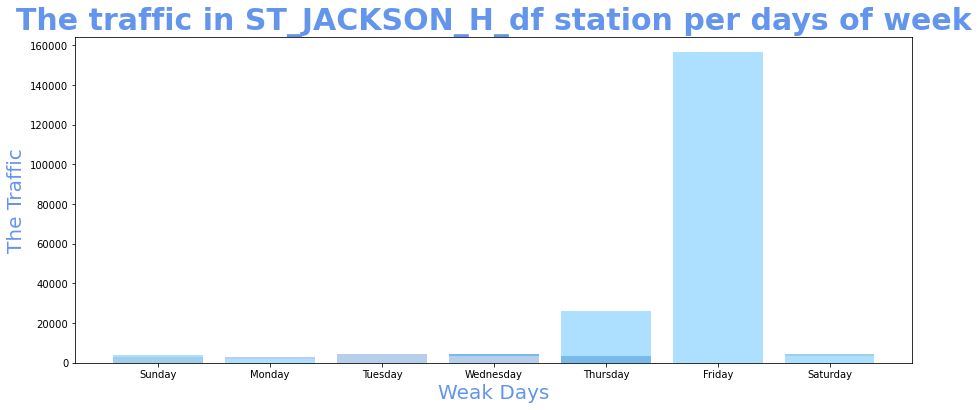

In [93]:
plt.figure(figsize=[15,6])

plt.title('The traffic in ST_JACKSON_H_df station per days of week',fontsize = 30, weight = 'bold',color='#6495ED')

plt.bar(ST_JACKSON_H_df['DAY_NAME'],ST_JACKSON_H_df['DAILY_TRAFFIC'], color=['#79BAEC','#ADDFFF','#ADDFFF','#A0CFEC','#ADDFFF','#B7CEEC','#B7CEEC', ]);
plt.xlabel('Weak Days',fontsize = 20,color='#6495ED')
plt.ylabel('The Traffic',fontsize = 20, color='#6495ED');

plt.savefig('The traffic in ST_JACKSON_H_df station per days of week.png')

In [ ]:
ST_CORONA_df.groupby(['DAY_NAME'],as_index=False).mean('DAILY_TRAFFIC')

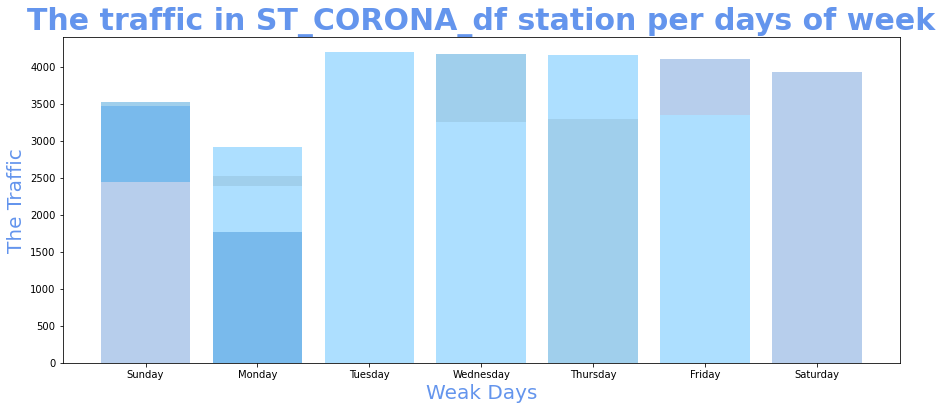

In [96]:
plt.figure(figsize=[15,6])

plt.title('The traffic in ST_CORONA_df station per days of week',fontsize = 30, weight = 'bold',color='#6495ED')

plt.bar(ST_CORONA_df['DAY_NAME'],ST_CORONA_df['DAILY_TRAFFIC'], color=['#79BAEC','#ADDFFF','#ADDFFF','#A0CFEC','#ADDFFF','#B7CEEC','#B7CEEC', ]);
plt.xlabel('Weak Days',fontsize = 20,color='#6495ED')
plt.ylabel('The Traffic',fontsize = 20, color='#6495ED');

plt.savefig('The traffic in ST_CORONA_df station per days of week.png')

In [ ]:
ST_df.groupby(['DAY_NAME'],as_index=False).mean('DAILY_TRAFFIC')

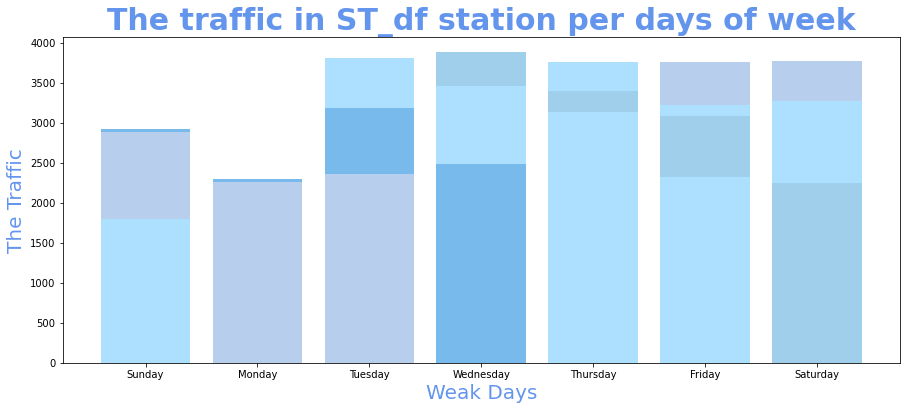

In [97]:
plt.figure(figsize=[15,6])

plt.title('The traffic in ST_df station per days of week',fontsize = 30, weight = 'bold',color='#6495ED')

plt.bar(ST_df['DAY_NAME'],ST_df['DAILY_TRAFFIC'], color=['#79BAEC','#ADDFFF','#ADDFFF','#A0CFEC','#ADDFFF','#B7CEEC','#B7CEEC', ]);
plt.xlabel('Weak Days',fontsize = 20,color='#6495ED')
plt.ylabel('The Traffic',fontsize = 20, color='#6495ED');

plt.savefig('The traffic in ST_df station per days of week.png')


In [ ]:
MYRTLE_AV_df.groupby(['DAY_NAME'],as_index=False).mean('DAILY_TRAFFIC')

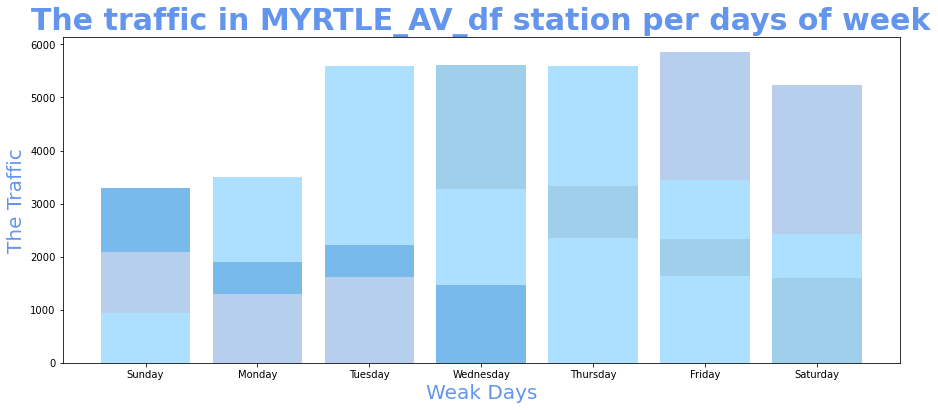

In [98]:
plt.figure(figsize=[15,6])

plt.title('The traffic in MYRTLE_AV_df station per days of week',fontsize = 30, weight = 'bold',color='#6495ED')

plt.bar(MYRTLE_AV_df['DAY_NAME'],MYRTLE_AV_df['DAILY_TRAFFIC'], color=['#79BAEC','#ADDFFF','#ADDFFF','#A0CFEC','#ADDFFF','#B7CEEC','#B7CEEC', ]);
plt.xlabel('Weak Days',fontsize = 20,color='#6495ED')
plt.ylabel('The Traffic',fontsize = 20, color='#6495ED');

plt.savefig('The traffic in MYRTLE_AV_df station per days of week.png')


In [83]:
JUNCTION_BLVD_df.groupby(['DAY_NAME'],as_index=False).mean('DAILY_TRAFFIC')

,DAY_NAME,DAILY_TRAFFIC
0,Friday,2129.275362
1,Monday,1474.138889
2,Saturday,2213.128788
3,Sunday,1818.687500
4,Thursday,2158.963768
5,Tuesday,1991.944444
6,Wednesday,2203.909722


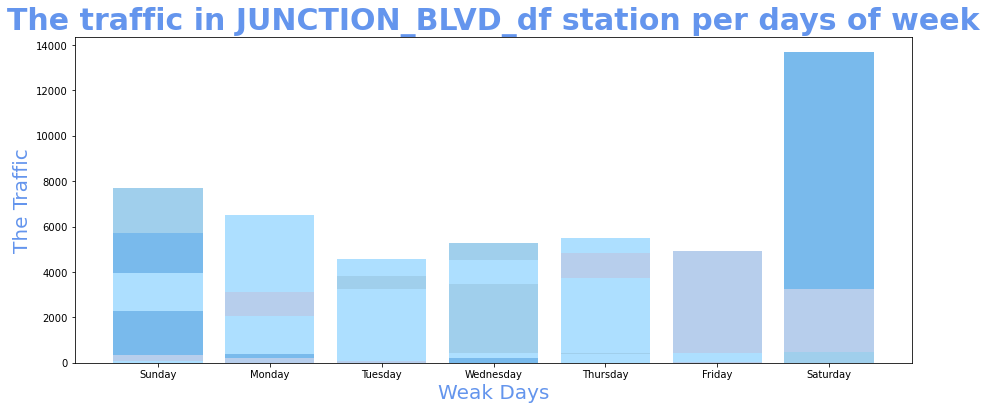

In [84]:
plt.figure(figsize=[15,6])

plt.title('The traffic in JUNCTION_BLVD_df station per days of week',fontsize = 30, weight = 'bold',color='#6495ED')

plt.bar(JUNCTION_BLVD_df['DAY_NAME'],JUNCTION_BLVD_df['DAILY_TRAFFIC'], color=['#79BAEC','#ADDFFF','#ADDFFF','#A0CFEC','#ADDFFF','#B7CEEC','#B7CEEC', ]);
plt.xlabel('Weak Days',fontsize = 20,color='#6495ED')
plt.ylabel('The Traffic',fontsize = 20, color='#6495ED');

plt.savefig('The traffic in JUNCTION_BLVD_df station per days of week.png')


In [85]:
JKSN_HT_ROOSVLT_df.groupby(['DAY_NAME'],as_index=False).mean('DAILY_TRAFFIC')

,DAY_NAME,DAILY_TRAFFIC
0,Friday,2114.378788
1,Monday,1704.799242
2,Saturday,2152.247934
3,Sunday,1690.727273
4,Thursday,2134.924242
5,Tuesday,1993.628788
6,Wednesday,2146.424242


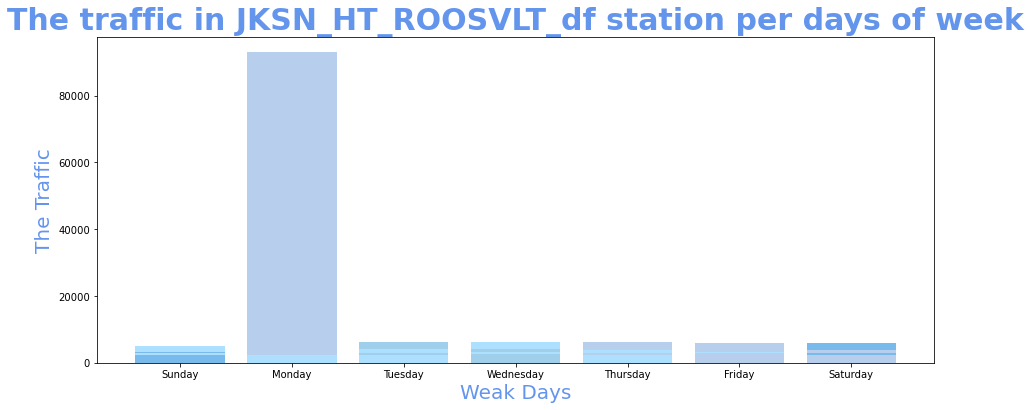

In [86]:
plt.figure(figsize=[15,6])

plt.title('The traffic in JKSN_HT_ROOSVLT_df station per days of week',fontsize = 30, weight = 'bold',color='#6495ED')

plt.bar(JKSN_HT_ROOSVLT_df['DAY_NAME'],JKSN_HT_ROOSVLT_df['DAILY_TRAFFIC'], color=['#79BAEC','#ADDFFF','#ADDFFF','#A0CFEC','#ADDFFF','#B7CEEC','#B7CEEC', ]);
plt.xlabel('Weak Days',fontsize = 20,color='#6495ED')
plt.ylabel('The Traffic',fontsize = 20, color='#6495ED');

plt.savefig('The traffic in JKSN_HT_ROOSVLT_df station per days of week.png')
